In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('flipkart_orders.csv')
df.head()

,OrderID,ProductName,Category,SubCategory,OrderDate,CustomerID,Price,Quantity
0,10001,Apple iPhone 14,Electronics,Mobile,2024-01-05,C001,70000,1
1,10001,Spigen iPhone Case,Accessories,Mobile Case,2024-01-05,C001,1200,1
2,10002,HP Laptop 15s,Electronics,Laptop,2024-01-07,C002,55000,1
3,10003,Adidas T-Shirt,Fashion,Clothing,2024-01-07,C003,1500,2
4,10003,Levi's Jeans,Fashion,Clothing,2024-01-07,C003,2500,1


In [2]:
df.shape
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OrderID      10 non-null     int64 
 1   ProductName  10 non-null     object
 2   Category     10 non-null     object
 3   SubCategory  10 non-null     object
 4   OrderDate    10 non-null     object
 5   CustomerID   10 non-null     object
 6   Price        10 non-null     int64 
 7   Quantity     10 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 772.0+ bytes


0

C:\Users\pc\AppData\Local\Temp\ipykernel_3500\2264836418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


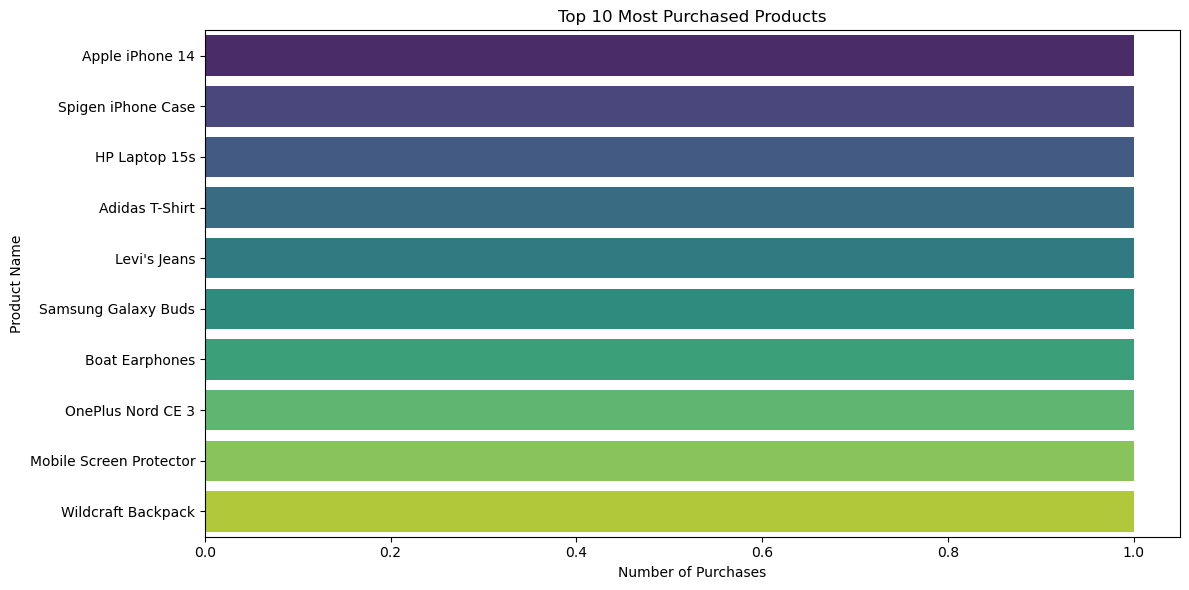

In [5]:

top_products = df['ProductName'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Name')
plt.tight_layout()
plt.savefig('mostpurchased_item.png')
plt.show()



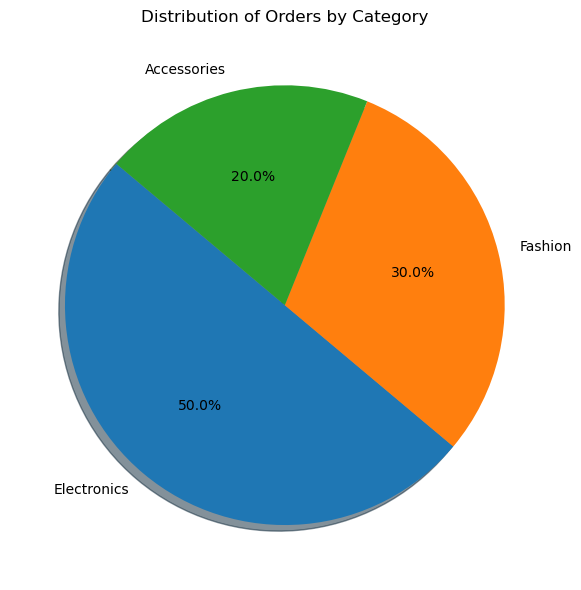

In [ ]:
category_counts = df['Category'].value_counts()

# Plot
plt.figure(figsize=(8,6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Orders by Category')
plt.ylabel('')
plt.tight_layout()
plt.savefig('distribution_orders_category.png')
plt.show()



d:\anaconda navigator\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


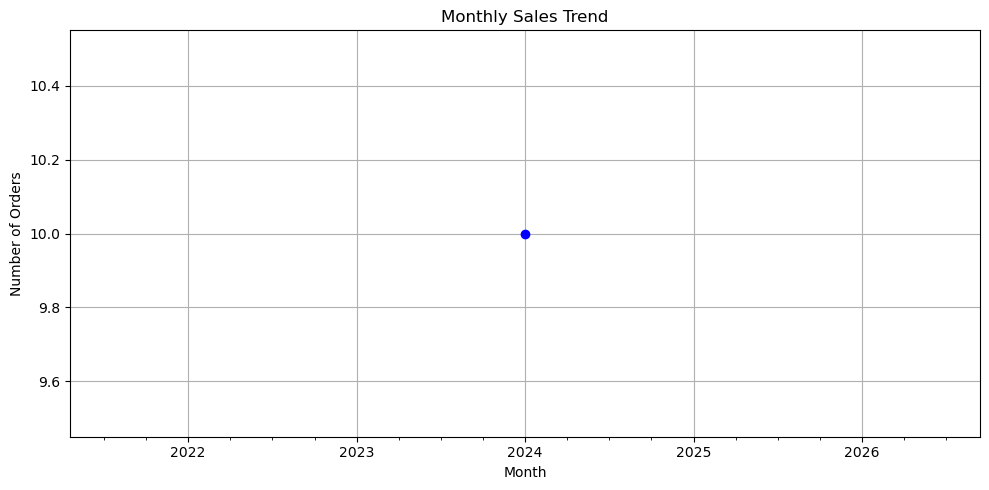

In [7]:
# Convert date column to datetime if not already done
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Group orders by month
monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M')).size()

# Plot
monthly_sales.plot(kind='line', marker='o', figsize=(10,5), color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_sales.png')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_3500\287125595.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_cat.values, y=avg_price_cat.index, palette='coolwarm')


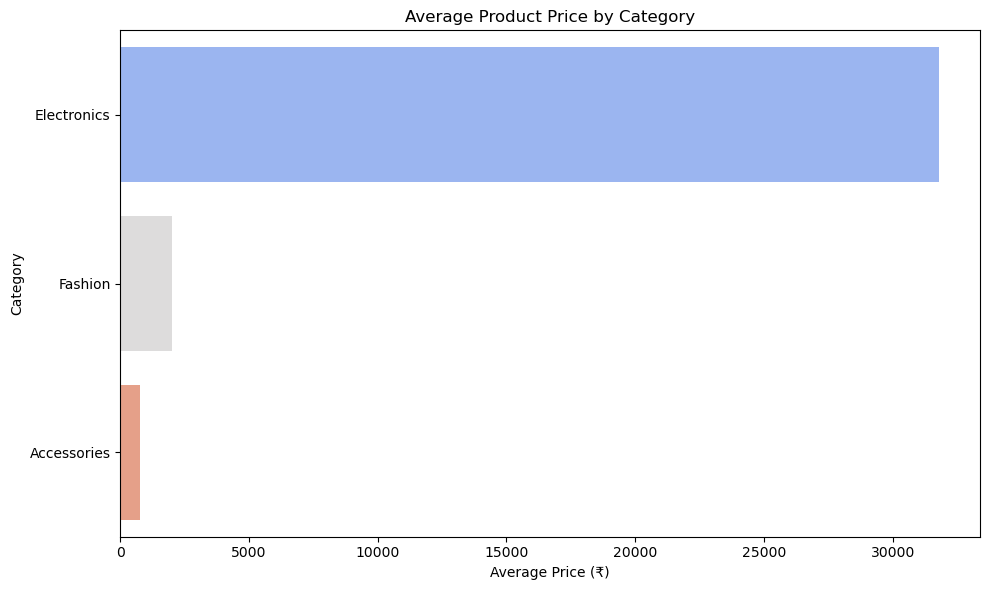

In [8]:
avg_price_cat = df.groupby('Category')['Price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_cat.values, y=avg_price_cat.index, palette='coolwarm')
plt.title('Average Product Price by Category')
plt.xlabel('Average Price (₹)')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('category_prize.png')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_3500\1785656921.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_sales.values, y=subcategory_sales.index, palette='magma')


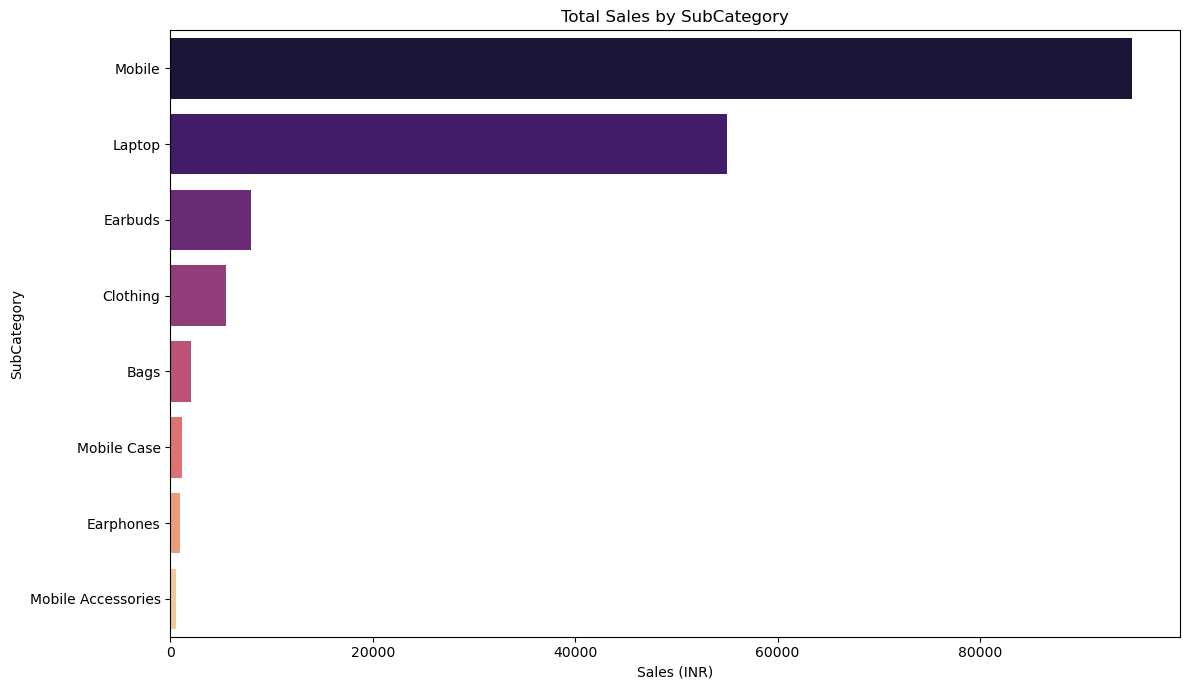

In [9]:
# Sales column create karte hain
df['Sales'] = df['Price'] * df['Quantity']
subcategory_sales = df.groupby('SubCategory')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x=subcategory_sales.values, y=subcategory_sales.index, palette='magma')
plt.title("Total Sales by SubCategory")
plt.xlabel("Sales (INR)")
plt.ylabel("SubCategory")
plt.tight_layout()
plt.savefig('total_sales_sybcategory.png')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_3500\3399781196.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='Oranges_r')


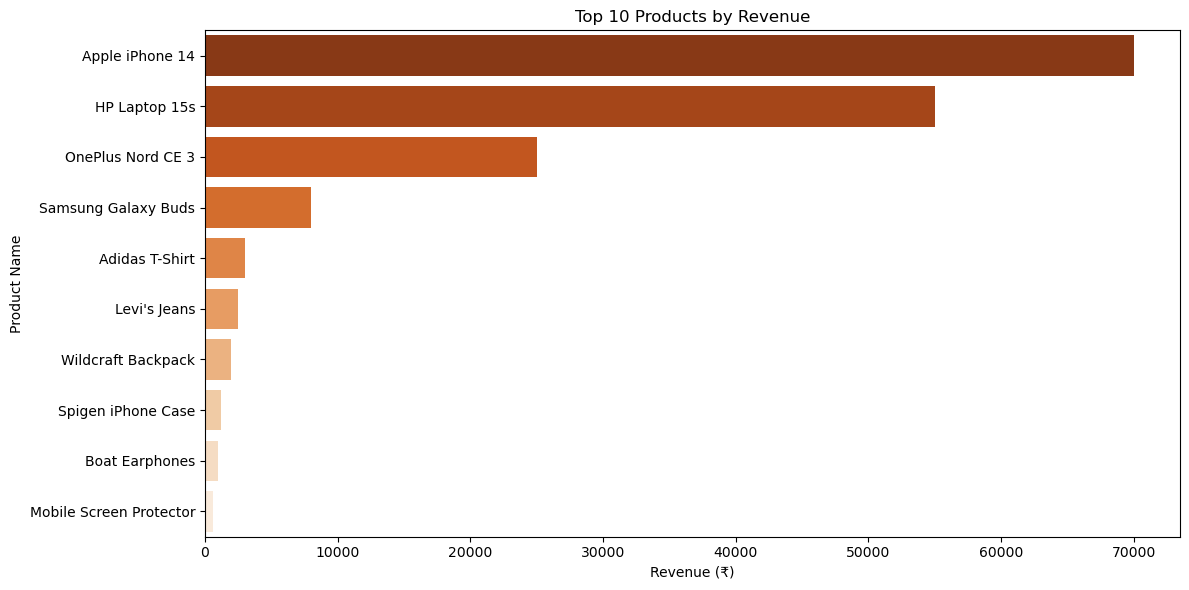

In [10]:
top_products = df.groupby('ProductName')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='Oranges_r')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue (₹)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.savefig('top10_product_revwnue.png')
plt.show()


In [11]:
# Check type and convert safely
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

df['MonthYear'] = df['OrderDate'].dt.to_period('M')


d:\anaconda navigator\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


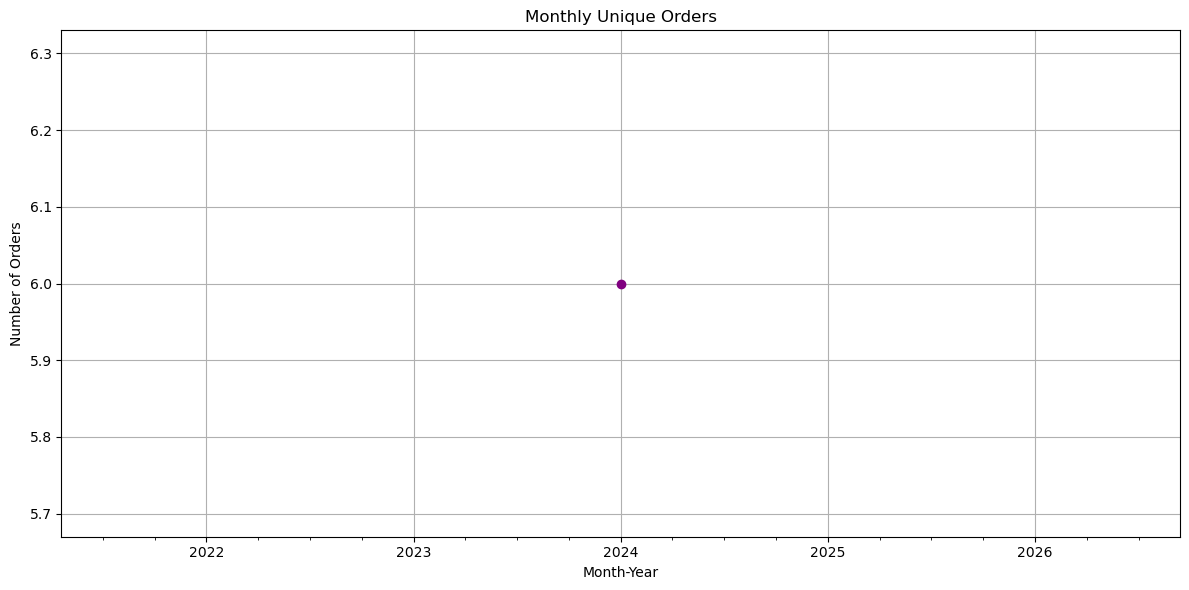

In [12]:

monthly_orders = df.groupby('MonthYear')['OrderID'].nunique()

plt.figure(figsize=(12,6))
monthly_orders.plot(marker='o', color='purple')
plt.title("Monthly Unique Orders")
plt.xlabel("Month-Year")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.savefig('unique-orders.png')
plt.show()


In [13]:
top_products = df.groupby('ProductName')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)
print(top_products)


               ProductName  Quantity
0           Adidas T-Shirt         2
5  Mobile Screen Protector         2
1          Apple iPhone 14         1
2           Boat Earphones         1
3            HP Laptop 15s         1
4             Levi's Jeans         1
6        OnePlus Nord CE 3         1
7      Samsung Galaxy Buds         1
8       Spigen iPhone Case         1
9       Wildcraft Backpack         1


C:\Users\pc\AppData\Local\Temp\ipykernel_3500\1701138247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='ProductName', data=top_products, palette='Spectral')


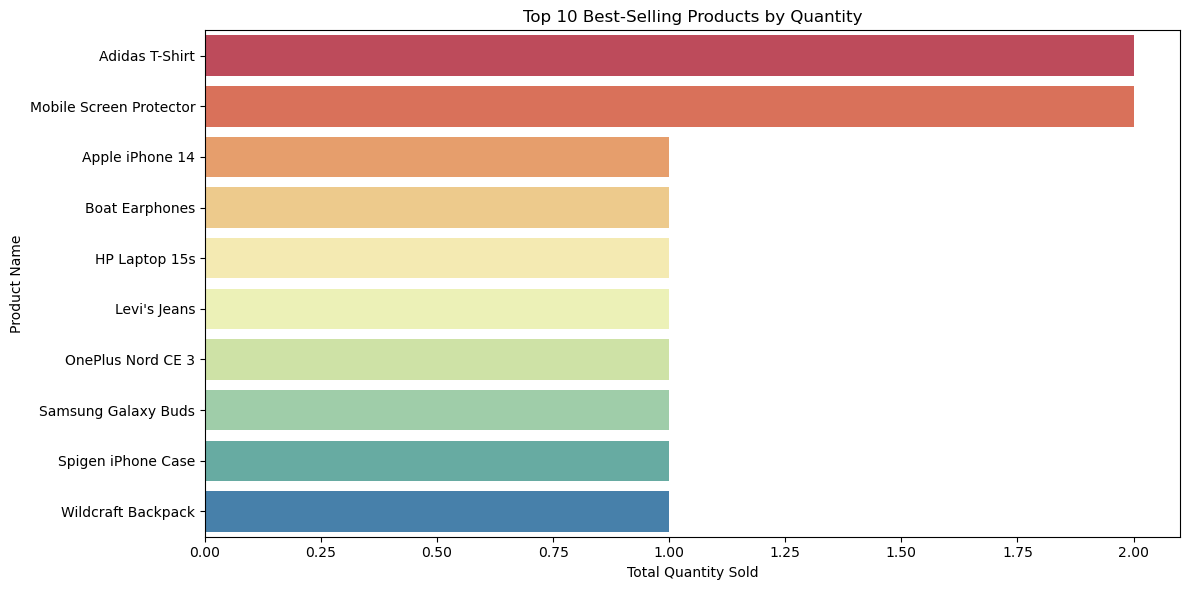

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x='Quantity', y='ProductName', data=top_products, palette='Spectral')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.savefig('top10_product_quantity.png')
plt.show()


In [15]:
category_sales = df.groupby('Category').apply(lambda x: (x['Price'] * x['Quantity']).sum()).reset_index(name='TotalSales')
category_sales = category_sales.sort_values(by='TotalSales', ascending=False)
print(category_sales)


      Category  TotalSales
1  Electronics      158999
2      Fashion        7500
0  Accessories        1798


C:\Users\pc\AppData\Local\Temp\ipykernel_3500\338412309.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_sales = df.groupby('Category').apply(lambda x: (x['Price'] * x['Quantity']).sum()).reset_index(name='TotalSales')


C:\Users\pc\AppData\Local\Temp\ipykernel_3500\2805734471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='Category', data=category_sales, palette='Blues_d')


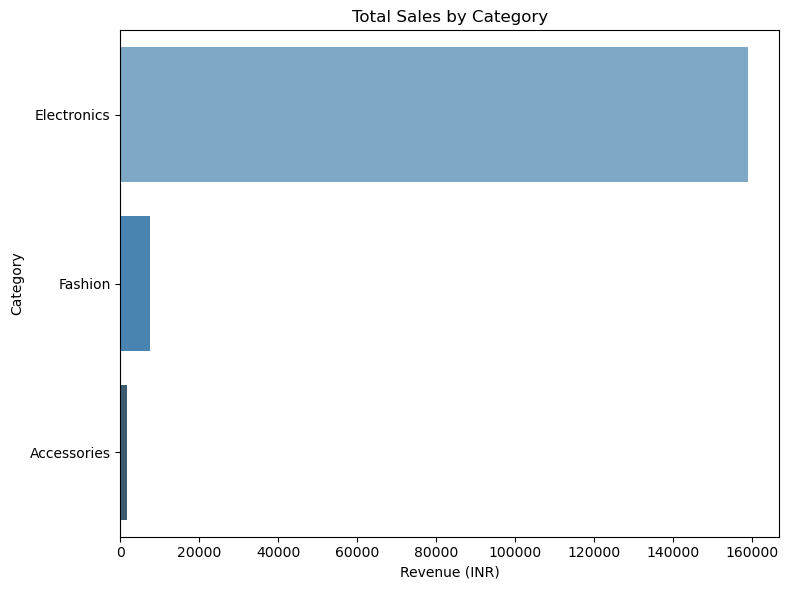

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x='TotalSales', y='Category', data=category_sales, palette='Blues_d')
plt.title('Total Sales by Category')
plt.xlabel('Revenue (INR)')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('total_sales_category.png')
plt.show()


In [17]:
subcategory_qty = df.groupby('SubCategory')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
print(subcategory_qty.head(10))


          SubCategory  Quantity
1            Clothing         3
5              Mobile         2
6  Mobile Accessories         2
0                Bags         1
2             Earbuds         1
3           Earphones         1
4              Laptop         1
7         Mobile Case         1


C:\Users\pc\AppData\Local\Temp\ipykernel_3500\2896313197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='SubCategory', data=subcategory_qty.head(10), palette='mako')


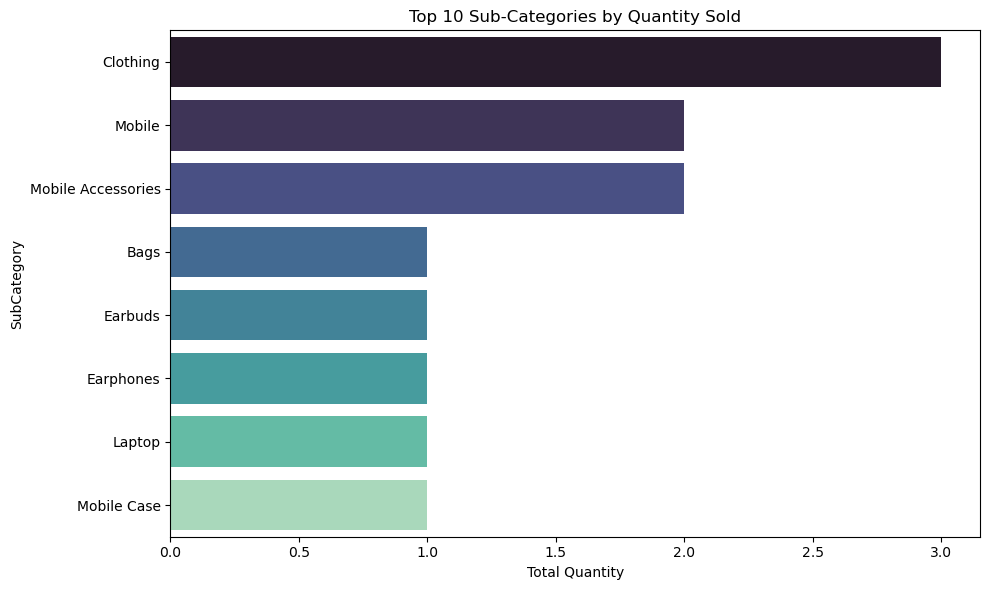

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='Quantity', y='SubCategory', data=subcategory_qty.head(10), palette='mako')
plt.title('Top 10 Sub-Categories by Quantity Sold')
plt.xlabel('Total Quantity')
plt.ylabel('SubCategory')
plt.tight_layout()
plt.savefig('top10_subcategory_quantity.png')
plt.show()
